In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.datasets import cifar10
from keras.layers import Dense, Convolution2D, Flatten, Activation, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils

import time
import datetime

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
n_examples = 40000

In [3]:
X1_train = []
X1_test = []

X2_train = []
X2_test = []

Y1_train = []
Y1_test = []

Y2_train = []
Y2_test = []

for ix in range(n_examples):
    if y_train[ix] < 5:
        # Put data in set 01
        X1_train.append(x_train[ix]/255.0)
        Y1_train.append(y_train[ix])
    else:
        # Put data in set 02
        X2_train.append(x_train[ix]/255.0)
        Y2_train.append(y_train[ix])

for ix in range(y_test.shape[0]):
    if y_test[ix] < 5:
        # Put data in set 01
        X1_test.append(x_test[ix]/255.0)
        Y1_test.append(y_test[ix])
    else:
        # Put data in set 02
        X2_test.append(x_test[ix]/255.0)
        Y2_test.append(y_test[ix])


In [4]:
X1_train = np.asarray(X1_train).reshape((-1, 32, 32, 3))
X1_test = np.asarray(X1_test).reshape((-1, 32, 32, 3))

X2_train = np.asarray(X2_train).reshape((-1, 32, 32, 3))
X2_test = np.asarray(X2_test).reshape((-1, 32, 32, 3))

Y1_train = np_utils.to_categorical(np.asarray(Y1_train), num_classes=5)
Y1_test = np_utils.to_categorical(np.asarray(Y1_test), num_classes=5)

Y2_train = np_utils.to_categorical(np.asarray(Y2_train)-5, num_classes=5)
Y2_test = np_utils.to_categorical(np.asarray(Y2_test)-5, num_classes=5)

In [5]:
split1 = int(0.8 * X1_train.shape[0])
split2 = int(0.8 * X2_train.shape[0])

x1_val = X1_train[split1:]
x1_train = X1_train[:split1]
y1_val = Y1_train[split1:]
y1_train = Y1_train[:split1]

x2_val = X2_train[split2:]
x2_train = X2_train[:split2]
y2_val = Y2_train[split2:]
y2_train = Y2_train[:split2]


In [6]:
print x1_train.shape, X1_test.shape
print Y1_train.shape, Y1_test.shape

print X2_train.shape, X2_test.shape
print Y2_train.shape, Y2_test.shape

(16005, 32, 32, 3) (5000, 32, 32, 3)
(20007, 5) (5000, 5)
(19993, 32, 32, 3) (5000, 32, 32, 3)
(19993, 5) (5000, 5)


In [39]:
model = Sequential()

model.add(Convolution2D(32, 5, input_shape=(32, 32, 3), activation='relu'))
model.add(Convolution2D(16, 5, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.42))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        12816     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               102528    
__________

In [40]:
start = datetime.datetime.now()
hist = model.fit(x1_train, y1_train,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(x1_val, y1_val), verbose=2)
time_taken = datetime.datetime.now() - start
print '-'*100
print time_taken

Train on 16005 samples, validate on 4002 samples
Epoch 1/10
3s - loss: 1.2611 - acc: 0.4622 - val_loss: 1.1570 - val_acc: 0.5037
Epoch 2/10
3s - loss: 1.0293 - acc: 0.5736 - val_loss: 0.9863 - val_acc: 0.5920
Epoch 3/10
3s - loss: 0.9617 - acc: 0.6069 - val_loss: 1.2256 - val_acc: 0.5047
Epoch 4/10
3s - loss: 0.9147 - acc: 0.6261 - val_loss: 0.9314 - val_acc: 0.6122
Epoch 5/10
3s - loss: 0.8890 - acc: 0.6416 - val_loss: 0.9128 - val_acc: 0.6312
Epoch 6/10
3s - loss: 0.8591 - acc: 0.6582 - val_loss: 0.8615 - val_acc: 0.6547
Epoch 7/10
3s - loss: 0.8270 - acc: 0.6727 - val_loss: 0.8614 - val_acc: 0.6574
Epoch 8/10
3s - loss: 0.8037 - acc: 0.6835 - val_loss: 0.8791 - val_acc: 0.6497
Epoch 9/10
3s - loss: 0.7756 - acc: 0.6927 - val_loss: 0.8285 - val_acc: 0.6737
Epoch 10/10
3s - loss: 0.7611 - acc: 0.7029 - val_loss: 0.8293 - val_acc: 0.6722
----------------------------------------------------------------------------------------------------
0:00:37.406075


In [42]:
for l in model.layers[:7]:
    l.trainable = False

In [44]:
trans_model = Sequential(model.layers[:7])

#trans_model.add(Dense(128))
#trans_model.add(Activation('relu'))

trans_model.add(Dense(5))
trans_model.add(Activation('softmax'))

trans_model.summary()
trans_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        12816     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               102528    
__________

In [45]:
start = datetime.datetime.now()
hist = trans_model.fit(x2_train, y2_train,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(x2_val, y2_val), verbose=2)
time_taken = datetime.datetime.now() - start
print '-'*100
print time_taken

Train on 15994 samples, validate on 3999 samples
Epoch 1/10
2s - loss: 1.1975 - acc: 0.5242 - val_loss: 0.9546 - val_acc: 0.6279
Epoch 2/10
2s - loss: 0.9596 - acc: 0.6239 - val_loss: 0.8997 - val_acc: 0.6482
Epoch 3/10
2s - loss: 0.9212 - acc: 0.6433 - val_loss: 0.8748 - val_acc: 0.6609
Epoch 4/10
2s - loss: 0.9042 - acc: 0.6529 - val_loss: 0.8598 - val_acc: 0.6684
Epoch 5/10
2s - loss: 0.8896 - acc: 0.6549 - val_loss: 0.8520 - val_acc: 0.6672
Epoch 6/10
2s - loss: 0.8811 - acc: 0.6586 - val_loss: 0.8445 - val_acc: 0.6727
Epoch 7/10
2s - loss: 0.8737 - acc: 0.6651 - val_loss: 0.8398 - val_acc: 0.6727
Epoch 8/10
2s - loss: 0.8717 - acc: 0.6632 - val_loss: 0.8354 - val_acc: 0.6769
Epoch 9/10
2s - loss: 0.8630 - acc: 0.6675 - val_loss: 0.8311 - val_acc: 0.6784
Epoch 10/10
2s - loss: 0.8619 - acc: 0.6696 - val_loss: 0.8275 - val_acc: 0.6787
----------------------------------------------------------------------------------------------------
0:00:24.113542


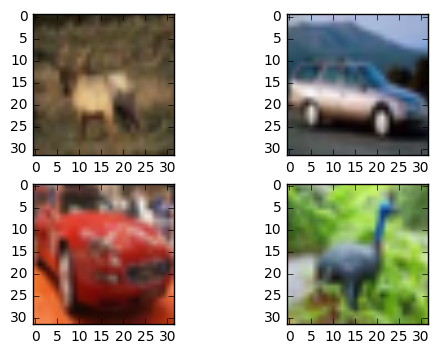

In [34]:
plt.figure(0)
plt.subplot(2, 2, 1)
plt.imshow(x1_train[0])

plt.subplot(2, 2, 2)
plt.imshow(x1_train[1])

plt.subplot(2, 2, 3)
plt.imshow(x1_train[2])

plt.subplot(2, 2, 4)
plt.imshow(x1_train[3])


plt.show()